# EDA

Whether EDA (exploratory data analysis) is the main purpose of your project, or is mainly being used for feature selection/feature engineering in a machine learning context, it's important to be able to understand the relationship between your features and your target variable.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
# PassengerId is a dataset artifact, not something useful for analysis
df.drop("PassengerId", axis=1, inplace=True)
# We want to use Age as one of the main examples, drop rows that are missing Age values
df.dropna(subset=["Age"], inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(714, 11)

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       529
Embarked      2
dtype: int64

## Numeric vs. Categorical EDA

Here we are trying to see the relationship between a given numeric feature and the target, which is categorical.  Let's use the `Age` column as an example.

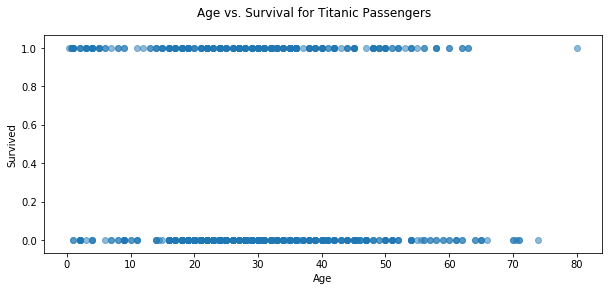

In [13]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(df["Age"], df["Survived"], alpha=0.5)
ax.set_xlabel("Age")
ax.set_ylabel("Survived")
fig.suptitle("Age vs. Survival for Titanic Passengers");

### Multiple Histograms

Rather than using the y axis to represent the two categories, let's use two different colors.  That means that we can use the y axis to represent counts rather than trying to discern this information from the density of dots.

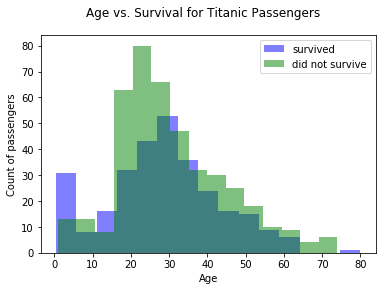

In [14]:
fig, ax = plt.subplots()

ax.hist(df[df["Survived"]==1]["Age"], bins=15, alpha=0.5, color="blue", label="survived")
ax.hist(df[df["Survived"]==0]["Age"], bins=15, alpha=0.5, color="green", label="did not survive")

ax.set_xlabel("Age")
ax.set_ylabel("Count of passengers")

fig.suptitle("Age vs. Survival for Titanic Passengers")

ax.legend();

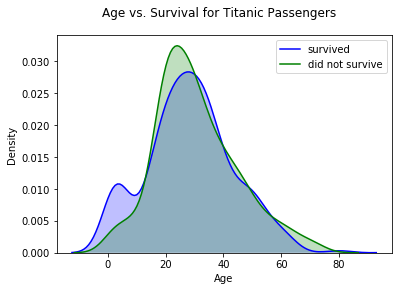

In [15]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Survived"]==1]["Age"], shade=True, color="blue", label="survived", ax=ax)
sns.kdeplot(df[df["Survived"]==0]["Age"], shade=True, color="green", label="did not survive", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Survival for Titanic Passengers");

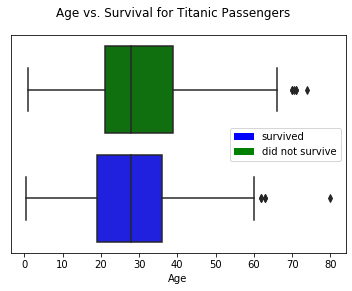

In [16]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="Survived", data=df, orient="h", palette={1:"blue", 0:"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Survival for Titanic Passengers")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches);

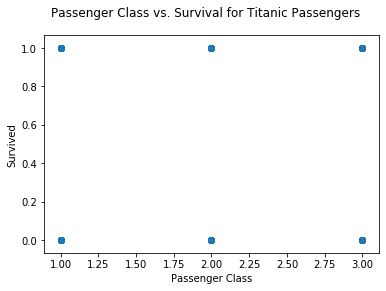

In [17]:
fig, ax = plt.subplots()

ax.scatter(df["Pclass"], df["Survived"], alpha=0.5)

ax.set_xlabel("Passenger Class")
ax.set_ylabel("Survived")

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

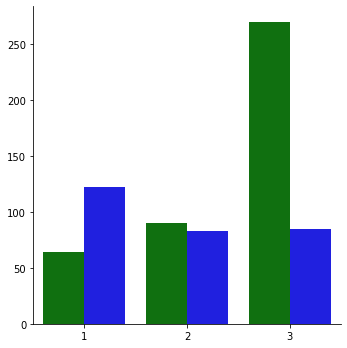

In [25]:
#fig, ax = plt.subplots()
sns.catplot(df["Pclass"], hue=df["Survived"], data=df, kind="count", 
            palette={1:"blue", 0:"green"})
#plt.close(2) # catplot creates an extra figure we don't need
#ax.set_xlabel("Passenger Class")
#color_patches = [Patch(facecolor="blue", label="survived"), Patch(facecolor="green", label="did not survive")]
#ax.legend(handles=color_patches)
#fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

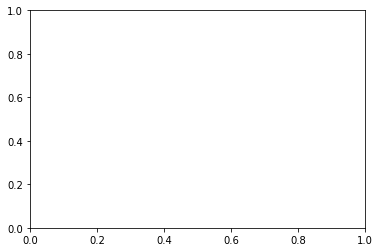

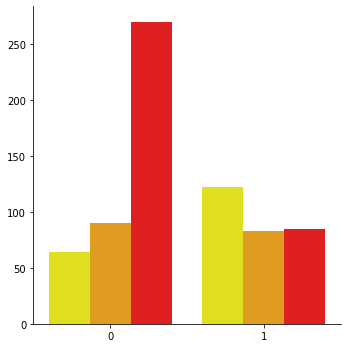

In [27]:
fig, ax = plt.subplots()

sns.catplot(df["Survived"], hue=df["Pclass"], data=df, kind="count", 
            palette={1:"yellow", 2:"orange", 3:"red"}, ax=ax)

plt.close(2) # catplot creates an extra figure we don't need

ax.legend(title="Passenger Class")
ax.set_xticklabels(["did not survive", "survived"])
ax.set_xlabel("")

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

In [28]:
# Create a dataframe with the counts by passenger class and survival
counts_df = df.groupby(["Pclass", "Survived"])["Name"].count().unstack()
counts_df

Survived,0,1
Pclass,,
1,64,122
2,90,83
3,270,85


In [46]:
# Divide by the total number and transpose for plotting
pclass_percents_df = (counts_df/(counts_df.sum())).T
pclass_percents_df

Pclass,1,2,3
Survived,,,
0,0.150943,0.212264,0.636792
1,0.420690,0.286207,0.293103


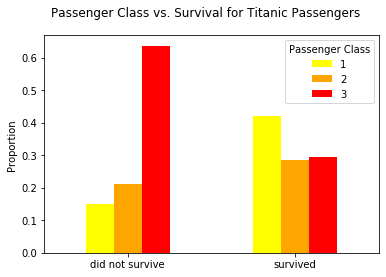

In [48]:
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=False, color=["yellow", "orange", "red"], ax=ax)

ax.legend(title="Passenger Class")
ax.set_xticklabels(["did not survive", "survived"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

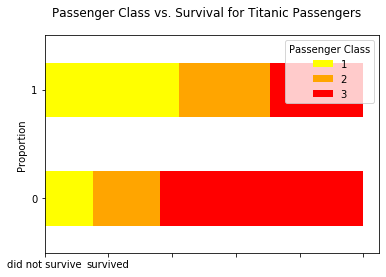

In [49]:
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="barh", stacked=True, color=["yellow", "orange", "red"], ax=ax)

ax.legend(title="Passenger Class")
ax.set_xticklabels(["did not survive", "survived"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

In [53]:
# Use the same counts df, but now survived + did not survive add up to 1
survived_percents_df = counts_df.T.div(counts_df.T.sum()),T
survived_percents_df

NameError: name 'T' is not defined

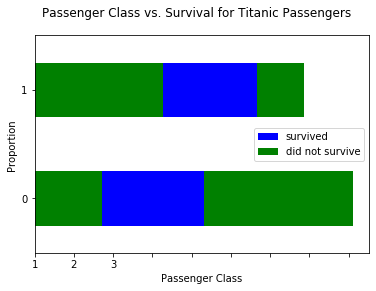

In [54]:
fig, ax = plt.subplots()

survived_percents_df.plot(kind="barh", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("Passenger Class")
ax.set_xticklabels([1, 2, 3], rotation=0)
ax.set_ylabel("Proportion")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches)

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

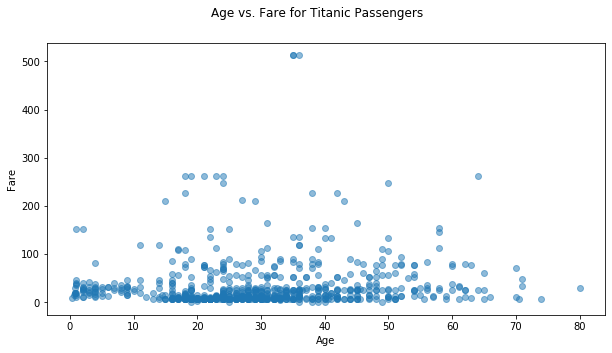

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df["Age"], df["Fare"], alpha=0.5)

ax.set_xlabel("Age")
ax.set_ylabel("Fare")

fig.suptitle("Age vs. Fare for Titanic Passengers");

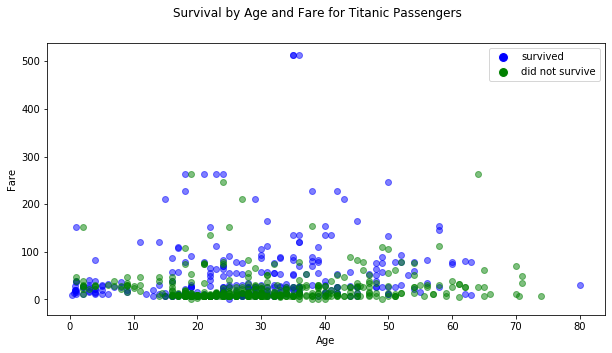

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["Survived"]==1]["Age"], df[df["Survived"]==1]["Fare"], c="blue", alpha=0.5)
ax.scatter(df[df["Survived"]==0]["Age"], df[df["Survived"]==0]["Fare"], c="green", alpha=0.5)

ax.set_xlabel("Age")
ax.set_ylabel("Fare")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='survived', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='did not survive', markerfacecolor='g', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Survival by Age and Fare for Titanic Passengers");